In [7]:
from scrap import get_estate_data_suumo,get_lat_lon
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("suumo.csv",index_col=0)

In [2]:
var=get_lat_lon(data["address"].values)

100%|██████████| 22440/22440 [42:32<00:00,  8.79it/s]  


In [4]:
data["lons"]=var[0]
data["lats"]=var[1]

In [6]:
data.to_csv("suumo_loc.csv")

6047


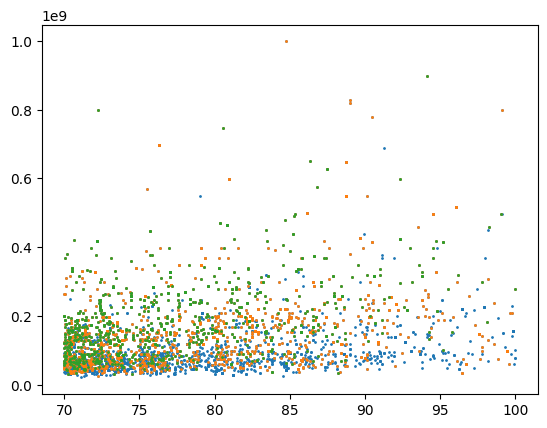

In [ ]:
data=data[data["area"]>=70]
data=data[data["area"]<=100]

print(len(data))

a=data[data["age_years"]<10]
b=data[data["age_years"]<20]
c=data[data["age_years"]<30]
d=data[data["age_years"]<40]
e=data[data["age_years"]<50]

for sample in [c,b,a]:
    plt.scatter(sample["area"].values,sample["price"].values,s=1)

In [4]:
origin=pd.read_csv("suumo_loc.csv",index_col=0)

In [6]:
dict_list = origin.to_dict(orient='records')

for row_dict in dict_list:
    print(row_dict)

{'name': 'ロクタス', 'price': 147000000, 'address': '東京都目黒区駒場１', 'area': 92.36, 'age_years': 15, 'age_months': 0, 'price per unit area': 5261473.148549155, 'lons': 139.686829, 'lats': 35.657032}
{'name': 'コーポ東山', 'price': 11000000, 'address': '東京都板橋区東山町', 'area': 32.93, 'age_years': 49, 'age_months': 8, 'price per unit area': 1104269.0555724264, 'lons': 139.687012, 'lats': 35.75433}
{'name': '洗足シュロス', 'price': 14000000, 'address': '東京都目黒区原町２-4-2', 'area': 36.45, 'age_years': 52, 'age_months': 6, 'price per unit area': 1269709.7393689984, 'lons': 139.692749, 'lats': 35.614708}
{'name': 'グリーンプラザ綾瀬II', 'price': 14000000, 'address': '東京都足立区綾瀬６-7-15', 'area': 37.27, 'age_years': 35, 'age_months': 0, 'price per unit area': 1241774.0810303192, 'lons': 139.824219, 'lats': 35.770725}
{'name': '豊栄アルベルゴ上野', 'price': 14800000, 'address': '東京都台東区上野７-３－９', 'area': 15.51, 'age_years': 44, 'age_months': 9, 'price per unit area': 3154451.5796260475, 'lons': 139.778076, 'lats': 35.712471}
{'name': 'パークハイツ',

In [7]:
import re
# 例となる住所
address = "東京都世田谷区道玄坂1丁目"

# 正規表現を用いて「区」を抽出
get_ward = lambda address : re.search(r'([^\x01-\x7E\xA1-\xDF]+区)', address).group(1)

wards_name={get_ward(origin["address"].values[i]) for i in range(len(origin))}

wards_name

{'東京都世田谷区',
 '東京都中央区',
 '東京都中野区',
 '東京都北区',
 '東京都千代田区',
 '東京都台東区',
 '東京都品川区',
 '東京都墨田区',
 '東京都大田区',
 '東京都文京区',
 '東京都新宿区',
 '東京都杉並区',
 '東京都板橋区',
 '東京都江戸川区',
 '東京都江東区',
 '東京都渋谷区',
 '東京都港区',
 '東京都目黒区',
 '東京都練馬区',
 '東京都荒川区',
 '東京都葛飾区',
 '東京都豊島区',
 '東京都足立区'}

In [25]:
import japanize_matplotlib

for ward_name in wards_name:
    by_ward=origin[origin["address"].str.contains(ward_name)]
    price_per_area=by_ward["price per unit area"].values
    age=by_ward["age_years"].values+(by_ward["age_months"]/12).values
    plt.scatter(age,price_per_area,label=ward_name,s=2)

    plt.legend()
    plt.savefig("image/"+ward_name+".png")
    plt.close()


NameError: name 'wards_name' is not defined

In [5]:
import GPy
import numpy as np

In [36]:
for ward_name in ["練馬区"]:
    by_ward=origin[origin["address"].str.contains(ward_name)]
    price_per_area=(by_ward["price per unit area"]/by_ward["price per unit area"].max()).values
    age=by_ward["age_years"].values+(by_ward["age_months"]/12).values

    X=np.stack([age],axis=1)
    y=price_per_area.reshape(-1,1)

    kernel=GPy.kern.RBF(input_dim=1)
    model = GPy.models.GPRegression(X, y, kernel)
    model.optimize(messages=True, max_iters=1e5)



Running L-BFGS-B (Scipy implementation) Code:
  runtime   i        f              |g|        
    00s17  000001   8.474771e+02   6.509319e+04 
    02s24  000014  -7.316039e+02   1.147917e+04 
    03s98  000029  -7.901877e+02   4.259044e-10 
Runtime:     03s98
Optimization status: Converged



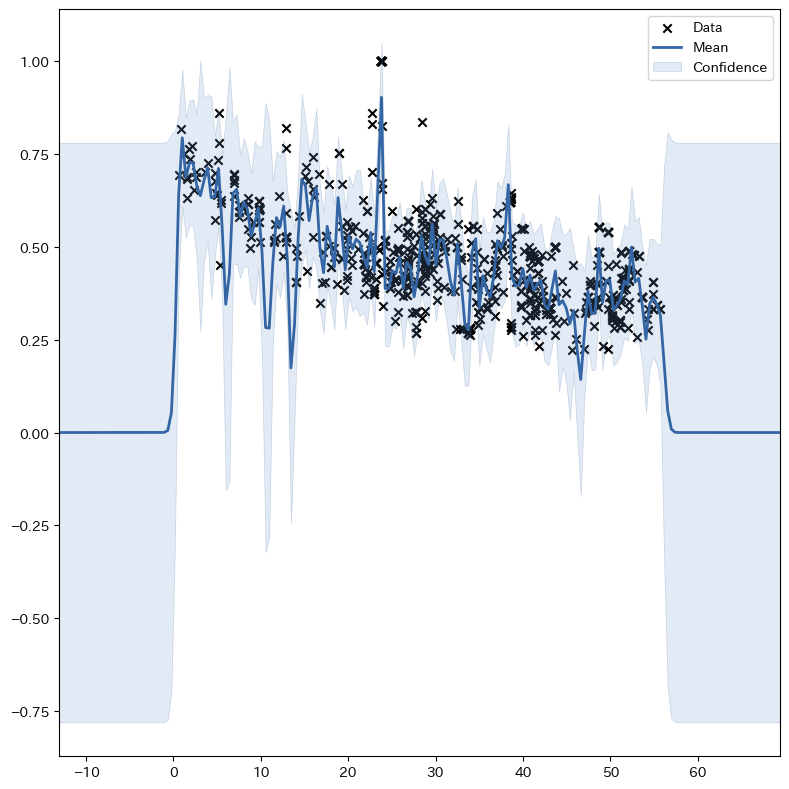

In [37]:
model.plot(levels=10)
plt.gcf().set_size_inches(8, 8, forward=True)

In [41]:
import requests
from bs4 import BeautifulSoup

url = "https://suumo.jp/jj/bukken/ichiran/JJ010FJ001/?ar=030&bs=011&ta=13&jspIdFlg=patternShikugun&sc=13101&sc=13102&sc=13103&sc=13104&sc=13105&sc=13113&sc=13106&sc=13107&sc=13108&sc=13118&sc=13121&sc=13122&sc=13123&sc=13109&sc=13110&sc=13111&sc=13112&sc=13114&sc=13115&sc=13120&sc=13116&sc=13117&sc=13119&kb=1&kt=9999999&mb=0&mt=9999999&ekTjCd=&ekTjNm=&tj=0&cnb=0&cn=9999999&srch_navi={{2}}&page={}"

html = html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')
estates_groups = soup.find("div",class_='property_unit_group')
estates = estates_groups.find_all('div', class_='property_unit')

NameError: name 'requests' is not defined

In [39]:
from datetime import datetime

now=datetime.now()

now.strftime("%Y-%m-%d")

'a2025-01-18'